# Clickbait Detection

Notebook ini dibuat untuk memenuhi tugas Kapita Selekta Sistem Cerdas - Natural Language Programming. Dataset diambil dari https://www.sciencedirect.com/science/article/pii/S2352340920311252?via%3Dihub, dengan menggunakan annotated_okezone.csv sebagai training data dan annotated_fimela sebagai testing data. Di bawah ini merupakan pengerjaannya.

## Load Data

Pertama-tama, lakukan import library yang akan dipakai serta loading dataset training dan testing terlebih dahulu. Untuk masing-masing dataset, kolom yang dipakai hanya kolom 'title' dan 'label_score'.

In [1]:
import pandas as pd
import numpy as np
import string as str

In [2]:
okezone = pd.read_csv(r'C:\Users\ACER\Desktop\annotated_okezone.csv', delimiter = ',')
okezone = okezone.drop(['label'], axis=1)
okezone.head()

,title,label_score
0,Ini Penyebab Jamaah Tertipu Penggunaan Visa No...,1
1,"Balita di Bogor Tewas dengan Luka Lebam, Ibu T...",0
2,"Demi Keadilan, Pria Ini Habiskan Rp526 Juta La...",1
3,Claudia Emanuela Santoso Harumkan Indonesia di...,0
4,"Kalah Saing di Monza, Bottas Akui Ketangguhan ...",0


In [3]:
fimela = pd.read_csv(r'C:\Users\ACER\Desktop\annotated_fimela.csv', delimiter = ',')
fimela = fimela.drop(['label'], axis=1)
fimela.head()

,title,label_score
0,Lewat Seni Anak-Anak akan Tampil Percaya Diri ...,0
1,"5 Manfaat Pilates untuk Ibu Hamil, Apa Saja?",1
2,Pentingnya Sarapan dengan Makanan Padat untuk ...,1
3,"Selalu Ingin Tahu, 5 Zodiak Ini Tidak Bisa Men...",1
4,3 Jenis Diet untuk Organ Intim Lebih Sehat,1


Lihat persebaran datanya dengan membuat bar plot.

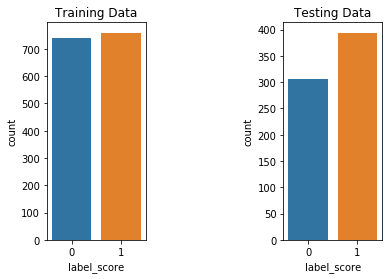

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.subplot(131)
plt.title("Training Data")
sns.countplot(x='label_score', data = okezone)

plt.subplot(133)
plt.title("Testing Data")
sns.countplot(x='label_score', data = fimela)
plt.show()

Dari sini, dapat diketahui bahwa persebaran data di dataset training dapat dianggap merata, sementara terdapat perbedaan signifikan persebaran di dataset testing.

## Text Pre-Processing

### Data Training

Akan dilihat vocabulary 1000 kata frekuensi terbanyak sebelum dan sesudah cleaning data:
1. Sebelum

In [5]:
from collections import Counter

title = " ".join(okezone['title'].values)
counter = Counter(title.split(" "))
counter.most_common(1000)

[('', 601),
 ('di', 425),
 ('Ini', 140),
 ('dan', 112),
 ('yang', 104),
 ('ke', 81),
 ('Indonesia', 78),
 ('Tak', 78),
 ('KPK', 78),
 (',', 75),
 ('2019', 73),
 ('Jadi', 70),
 ('dari', 70),
 ('untuk', 69),
 ('dengan', 65),
 ('hingga', 47),
 ('Liga', 42),
 ('5', 40),
 ('Jokowi', 39),
 ('Bisa', 39),
 ('UU', 38),
 ('Ibu', 37),
 ('3', 34),
 ('Liverpool', 33),
 ('DPR', 33),
 ('Revisi', 33),
 ('Baru', 33),
 ('Viral', 33),
 ('Karhutla', 32),
 ('Cukai', 32),
 ('4', 32),
 ('China', 32),
 ('Akan', 31),
 ('Kota', 30),
 ('MotoGP', 29),
 ('Ada', 29),
 ('Mobil', 28),
 ('Open', 28),
 ('Naik', 26),
 ('Hari', 26),
 ('Timnas', 25),
 ('Polisi', 25),
 ('saat', 25),
 ('Lebih', 24),
 ('Pertama', 24),
 ('Menteri', 23),
 ('Rumah', 23),
 ('Dunia', 23),
 ('Bikin', 23),
 ('Siap', 22),
 ('Kabut', 22),
 ('Tahun', 22),
 ('Tampil', 22),
 ('Pria', 21),
 ('Bakal', 21),
 ('Babak', 21),
 ('Ingin', 21),
 ('Tiga', 21),
 ('Hasil', 21),
 ('soal', 21),
 ('Asap', 21),
 ('Minta', 21),
 ('U-16', 20),
 ('Rokok', 20),
 ('Champion

Dapat dilihat bahwa terdapat beberapa tanda baca serta stopwords yang masih berada di frekuensi teratas library ini.

2. Sesudah

Selanjutnya yang akan dilakukan adalah cleaning data dari stopwords, kemudian lowercasing dan tokenizing. Lakukan import dari library yang dibutuhkan. Data yang sudah dibersihkan kemudian akan dijadikan satu dalam sebuah kosakata. Untuk membatasi kosakatanya, akan diambil 1000 kata dengan frekuensi terbanyak.

Awalnya, mulai dengan membuat sebuah class preprocess berisi fungsi untuk membersihkan data, membuat data menjadi token, membuat vocabulary, serta membatasi vocabulary.

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

class preprocess():
    def cleaning(kata):
        kata = [word.lower() for word in kata]
        kata = [word for word in kata if word.isalpha()]
        stopword = set(stopwords.words('indonesian'))
        kata = [word for word in kata if not word in stopword]
        return kata

    def token(col, df):
        df['token'] = df.apply(lambda row: nltk.word_tokenize(row[col]), axis = 1)
        return df

    def vocabs(col, df):
        vocabulary = []
        for i in range(len(df[col])):
            vocabulary += df.loc[i, col]
        return vocabulary 
    
    def vocab_used(kata):
        kata = nltk.FreqDist(kata)
        kata = kata.most_common(1000)
        kata = [word for word, word_count in kata]
        return kata

Setelah mendefinisikan class preprocess, panggil fungsi di dalam kelas tersebut untuk membuat vocabulary yang terdiri dari 1000 kata dengen frekuensi terbanyak.

In [7]:
tokenized = preprocess.token('title', okezone)
vocab = preprocess.vocabs('token', okezone)
clean = preprocess.cleaning(vocab)
vocab = preprocess.vocab_used(clean)

print("Vocab yang akan digunakan adalah: \n\n", vocab)

Vocab yang akan digunakan adalah: 

 ['kpk', 'indonesia', 'jokowi', 'liga', 'karhutla', 'uu', 'dpr', 'viral', 'liverpool', 'kota', 'revisi', 'mobil', 'cukai', 'china', 'asap', 'motogp', 'open', 'timnas', 'polisi', 'dunia', 'menteri', 'rumah', 'champions', 'bikin', 'pria', 'kabut', 'rokok', 'tampil', 'babak', 'hasil', 'netizen', 'misano', 'riau', 'pemerintah', 'anak', 'warga', 'man', 'united', 'pimpinan', 'inggris', 'orang', 'pakai', 'gagal', 'tersangka', 'setia', 'gara', 'brimob', 'napoli', 'san', 'marino', 'minyak', 'hutan', 'vs', 'video', 'juta', 'negara', 'mako', 'harga', 'kebakaran', 'barcelona', 'saudi', 'akui', 'imam', 'meninggal', 'inter', 'dewan', 'gudang', 'laga', 'emas', 'jelang', 'intip', 'juara', 'marquez', 'ekonomi', 'nahrawi', 'nikita', 'mirzani', 'jateng', 'seksi', 'ihsg', 'madrid', 'ala', 'hadapi', 'filipina', 'september', 'kalah', 'menpora', 'miliar', 'kisah', 'nilai', 'malaysia', 'akibat', 'ronaldo', 'industri', 'jalan', 'resmi', 'serangan', 'aragon', 'quartararo', 'a

Di atas adalah kosakata apa saja yang akan kita gunakan untuk training, diurutkan dari yang frekuensinya paling banyak. Dapat dilihat bahwa kosakata di atas banyak terdiri dari nama, baik orang, tempat, negara, atau klub bola. 

### Data Testing

Selanjutnya, akan diaplikasikan pembersihan data dan pengubahannya menjadi token pada testing set untuk memudahkan fase testing nanti.

In [8]:
tokenized_f = preprocess.token('title', fimela)
for i in range(len(fimela['token'])):
    fimela.at[i, 'token'] = preprocess.cleaning(fimela.loc[i, 'token'])

## Training Phase

Dalam fase training yang akan dilakukan adalah membangun Multinomial Naive Bayes. Namun sebelumnya, perlu dilakukan estimasi dua parameter untuk menentukan sebuah judul berita clickbait atau tidak. Selain itu karena kosakata yang ada hanya terbatas, akan dilakukan Laplace Smoothing (add one smoothing) untuk membantu perhitungan kata yang tidak berada dalam kosakata.

Cari terlebih dahulu probabilitas kategori clickbait dan tidak clickbait dalam dataset training. Untuk memudahkan pengaksesan data berdasar kategorinya, simpan dalam bentuk csv.

In [9]:
bait = okezone[okezone['label_score'] == 1]
bait_prob = len(bait)/len(okezone)
print("Probabilitas sebuah berita Clickbait adalah: ", bait_prob)

#bait.to_csv(r'C:\Users\ACER\Desktop\bait_train.csv', index = False, header=True)
bait = pd.read_csv(r'C:\Users\ACER\Desktop\bait_train.csv', delimiter = ',')
bait = bait.drop(['token'], axis=1)

non = okezone[okezone['label_score'] == 0]
non_prob = len(non)/len(okezone)
print("Probabilitas sebuah berita Non Clickbait adalah: ", non_prob)

#non.to_csv(r'C:\Users\ACER\Desktop\non_train.csv', index = False, header=True)
non = pd.read_csv(r'C:\Users\ACER\Desktop\non_train.csv', delimiter = ',')
non = non.drop(['token'], axis=1)

Probabilitas sebuah berita Clickbait adalah:  0.506
Probabilitas sebuah berita Non Clickbait adalah:  0.494


Dapat terlihat bahwa probabilitasnya sama seperti yang dicerminkan pada bar plot penyebaran data clickbait dan tidak clickbait (hanya terdapat sedikit perbedaan).

Selanjutnya, definisikan fungsi untuk menghitung probabilitas tiap kata dan vocabulary berdasar kategori clickbait atau tidak.

In [10]:
def word_prob(kata):
    frequency = nltk.FreqDist(kata)
    wordfreq = dict((word, freq) for word, freq in frequency.items() if not word.isdigit())
    for i in wordfreq:
        total = 0
        total += wordfreq[i]
    for i in wordfreq:
        wordfreq[i] = (wordfreq[i] + 1)/(total + len(kata))
    return wordfreq

def vocab_used2(kata):
    used2 = []
    sering = nltk.FreqDist(kata)
    sering = sering.most_common(1000)
    for i in range(len(kata)):
        for j in range(len(sering)):
            if kata[i] == sering[j][0]:
                used2.append(kata[i])
    return used2

Kemudian hitung probabilitas tiap hurufnya dengan memanggil fungsi yang telah didefinisikan sebelumnya.

- Vocabulary Clickbait

In [11]:
tokenized_b = preprocess.token('title', bait)
vocab_b = preprocess.vocabs('token', bait)
clean_b = preprocess.cleaning(vocab_b)
vocab_b = vocab_used2(clean_b)
word_b = word_prob(vocab_b)

print(word_b)

{'penyebab': 0.002336448598130841, 'jamaah': 0.0014602803738317756, 'tertipu': 0.0008761682242990654, 'penggunaan': 0.0008761682242990654, 'visa': 0.0005841121495327102, 'keadilan': 0.0005841121495327102, 'pria': 0.005841121495327103, 'habiskan': 0.0011682242990654205, 'juta': 0.002628504672897196, 'lawan': 0.0014602803738317756, 'denda': 0.0005841121495327102, 'tilang': 0.0008761682242990654, 'titi': 0.0005841121495327102, 'dj': 0.0008761682242990654, 'borong': 0.0005841121495327102, 'peserta': 0.0008761682242990654, 'blind': 0.0005841121495327102, 'audition': 0.0005841121495327102, 'the': 0.0011682242990654205, 'voice': 0.0008761682242990654, 'indonesia': 0.011098130841121495, 'episode': 0.0005841121495327102, 'sukses': 0.0017523364485981308, 'riri': 0.0005841121495327102, 'muha': 0.0005841121495327102, 'hadirkan': 0.0008761682242990654, 'lagu': 0.0020443925233644858, 'memopulerkan': 0.0005841121495327102, 'fesyen': 0.0008761682242990654, 'ramah': 0.0008761682242990654, 'lingkungan':

- Vocabulary Non-Clickbait

In [12]:
tokenized_n = preprocess.token('title', non)
vocab_n = preprocess.vocabs('token', non)
clean_n = preprocess.cleaning(vocab_n)
vocab_n = vocab_used2(clean_n)
word_n = word_prob(vocab_n)

print(word_n)

{'balita': 0.0005518763796909492, 'bogor': 0.0005518763796909492, 'tewas': 0.0016556291390728477, 'luka': 0.0008278145695364238, 'lebam': 0.0005518763796909492, 'tiri': 0.0005518763796909492, 'ditetapkan': 0.0008278145695364238, 'tersangka': 0.004415011037527594, 'claudia': 0.0005518763796909492, 'emanuela': 0.0005518763796909492, 'santoso': 0.0005518763796909492, 'harumkan': 0.0005518763796909492, 'indonesia': 0.01379690949227373, 'the': 0.0016556291390728477, 'voice': 0.0005518763796909492, 'of': 0.0005518763796909492, 'germany': 0.0005518763796909492, 'kalah': 0.0024834437086092716, 'saing': 0.0008278145695364238, 'monza': 0.0005518763796909492, 'bottas': 0.0008278145695364238, 'akui': 0.0033112582781456954, 'ketangguhan': 0.0008278145695364238, 'leclerc': 0.0008278145695364238, 'afc': 0.0005518763796909492, 'solidarity': 0.0005518763796909492, 'cup': 0.0005518763796909492, 'jalur': 0.0013796909492273732, 'alternatif': 0.0011037527593818985, 'timnas': 0.00358719646799117, 'piala': 0

Dapat disimpulkan bahwa dua vocabulary di atas memiliki kata dan okurensi kata yang berbeda. Ada pula kata yang tidak muncul dalam vocabulary awal, namun muncul dalam vocabulary kategori ini. 

## Testing Phase

Dalam fase testing, yang akan dilakukan adalah memprediksi kolom label_score dalam dataset fimela sebagai testing setnya. 

Awalnya, definisikan terlebih dahulu fungsi untuk menghitung jumlah per kata. Lalu hitung perkiraan probabilitas per kata dalam tiap kategori.

In [13]:
def value(kata):
    frequency = nltk.FreqDist(kata)
    wordfreq = dict((word, freq) for word, freq in frequency.items() if not word.isdigit())
    for i in wordfreq:
        total = 0
        total += wordfreq[i]
    return (total + len(kata))

prob_bait = bait_prob
for i in range(len(fimela)):
    prob_bait = bait_prob
    for j in range(len(fimela.loc[i, 'token'])):
        for m, n in word_b.items():
            if (fimela.loc[i, 'token'][j] == m):
                prob_bait = prob_bait*1
            if prob_bait == bait_prob:
                prob_bait = prob_bait*(1/value(word_b))
    fimela.at[i, 'probability_bait'] = prob_bait
    
prob_non = non_prob
for i in range(len(fimela)):
    prob_non = non_prob
    for j in range(len(fimela.loc[i, 'token'])):
        for m, n in word_n.items():
            if (fimela.loc[i, 'token'][j] == m):
                prob_non = prob_non*1
            if prob_non == non_prob:
                prob_non = prob_non*(1/value(word_n))
    fimela.at[i, 'probability_non'] = prob_non

Kemudian, buat prediksinya dengan membandingkan perkiraan probabilitas clickbait dengan perkiraan probabilitas tidak clickbait.

In [14]:
for i in range(len(fimela)):
    if fimela.loc[i, 'probability_bait'] >= fimela.loc[i, 'probability_non']:
        fimela.at[i, 'pred'] = int(1)
    else:
        fimela.at[i, 'pred'] = int(0)

pd.set_option('display.max_rows', None)
print(fimela[['title', 'label_score', 'pred']])

                                                 title  label_score  pred
0    Lewat Seni Anak-Anak akan Tampil Percaya Diri ...            0   1.0
1         5 Manfaat Pilates untuk Ibu Hamil, Apa Saja?            1   1.0
2    Pentingnya Sarapan dengan Makanan Padat untuk ...            1   1.0
3    Selalu Ingin Tahu, 5 Zodiak Ini Tidak Bisa Men...            1   1.0
4           3 Jenis Diet untuk Organ Intim Lebih Sehat            1   1.0
5    Move On, Ini 5 Tanda Mantan Tak Akan Mengajakm...            1   1.0
6    Mengenal Bahaya Memakai Baju Baru Tanpa Dicuci...            1   1.0
7    Minum Secangkir Tiap Hari, Cokelat Panas Bisa ...            0   1.0
8    Pertengkaran dengan Pasangan Bisa Memperkuat H...            1   1.0
9    Apakah Ada Manfaat Minum Air Mineral? Ini Fakt...            1   1.0
10   Jatuh Cinta Sewajarnya Saja agar Tak Berujung ...            0   1.0
11   5 Tips Menyimpan Uang untuk Membeli Rumah Pertama            1   1.0
12                Tips Membuat Kamar B

Terakhir, hitung akurasinya dengan membandingkan prediksi dengan label_score aslinya.

In [15]:
correct = 0
for i in range(len(fimela)):    
    if fimela.loc[i, 'pred'] == fimela.loc[i, 'label_score']:
        correct += 1
print('Ketepatan: ', correct/len(fimela))

Ketepatan:  0.5628571428571428


Ketepatan model ini adalah 56%, jadi dapat disimpulkan bahwa model belum maksimal dalam memprediksi clickbait atau tidaknya.

### Macro Averaging dan Micro Averaging

Aplikasikan macro dan micro averaging untuk melihat ketepatan prediksinya berdasarkan true positive, true negative, fake positive, dan fake negative tiap kategori.

In [16]:
tp_bait = 0;  tp_non = 0; 
fp_bait = 0; fp_non = 0; 
tn_bait = 0; tn_non = 0; 
fn_bait = 0; fn_non = 0

for i in range(len(fimela)):
    if (fimela.loc[i, 'label_score']==1 and fimela.loc[i, 'pred']==1):
        tp_bait += 1
    elif (fimela.loc[i, 'label_score']==0 and fimela.loc[i, 'pred']==0):
        tp_non += 1
    elif (fimela.loc[i, 'label_score']==0 and fimela.loc[i, 'pred']==1):
        fp_bait += 1
    elif (fimela.loc[i, 'label_score']==1 and fimela.loc[i, 'pred']==0):
        fp_non += 1
    elif (fimela.loc[i, 'label_score']==0 and fimela.loc[i, 'pred']==0):
        tn_bait += 1
    elif (fimela.loc[i, 'label_score']==1 and fimela.loc[i, 'pred']==1):
        tn_non += 1
    elif (fimela.loc[i, 'label_score']==1 and fimela.loc[i, 'pred']==0):
        fn_bait +=1
    elif (fimela.loc[i, 'label_score']==0 and fimela.loc[i, 'pred']==1):
        fn_non += 1

Tampilkan masing-masing ketepatan dengan kode di bawah ini. 

In [17]:
precise_bait = tp_bait/(tp_bait + fp_bait)
#precise_non = tp_non/(tp_non + fp_non)
precise_non = 0
precise_max = (precise_bait + precise_non)/2
precise_min = (tp_bait + tp_non)/(tp_bait + tp_non + fp_bait + fp_non)

print('Macro Averaging: ', precise_max)
print('Micro Averaging: ', precise_min)

Macro Averaging:  0.2814285714285714
Micro Averaging:  0.5628571428571428


Dari macro dan microaveraging di atas, dapat dilihat bahwa model prediksi ini tetap belum memiliki presisi yang lebih tinggi dibanding ketepatan aslinya. Jadi, dapat ditarik kesimpulan bahwa sebaiknya perlu dilakukan perbaikan pada model sebelum dipakai untuk dataset lainnya.

## Analisis dan Kesimpulan

Dalam notebook ini, training set yang digunakan adalah annotated_okezone.csv dengan testing set annotated_fimela.csv. Tujuan pembuatannya adalah untuk memprediksi apakah sebuah judul berita termasuk clickbait atau tidak. Persebaran data pada training set tidak memiliki perbedaan signifikan (perbedaan hanya sekitar 3 entry), sementara pada testing set memiliki perbedaan yang cukup jauh.

Akurasi yang didapat setelah pengaplikasian model adalah 56% dari testing set. Akurasi setelah macro dan microaveraging juga masih rendah. Berikut merupakan beberapa penyebabnya:
- Terdapat perbedaan yang cukup jauh dalam tiap vocabulary yang digunakan dalam training set dengan vocabulary testing set.
- Model masih kurang optimal, dapat dilihat dari prediksinya yang mengeluarkan nilai label_score = 1 untuk setiap judul.
- Perbedaan cara penulisan dari satu platform berita dengan platform lainnya.

Dalam pembuatan model ke depannya, beberapa hal yang perlu diperhatikan adalah:
- Vocabulary training dan testing set harus setidak-tidaknya memiliki lumayan banyak kesamaan sehingga penggunaan Laplace Smoothing lebih akurat.
- Diperlukan pengetahuan lebih mendalam untuk membuat model prediksi dengan keakuratan tinggi tanpa menggunakan library pemudahnya.